In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import cv2
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras import backend as K
import keras
import matplotlib.pyplot as plt

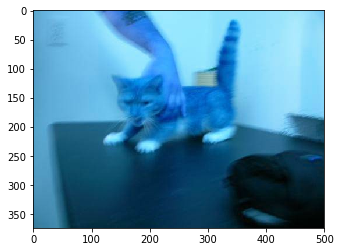

cat


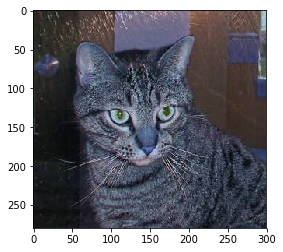

cat


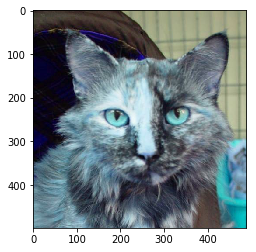

cat


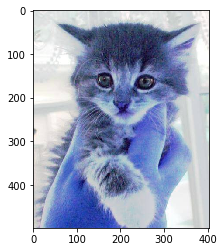

cat


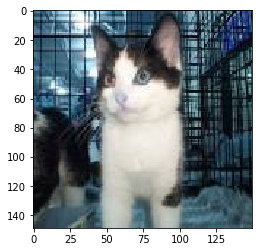

cat


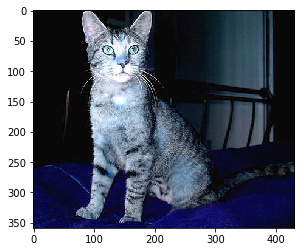

cat


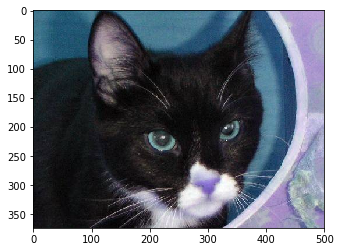

cat


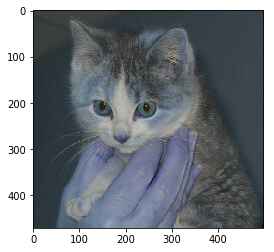

cat


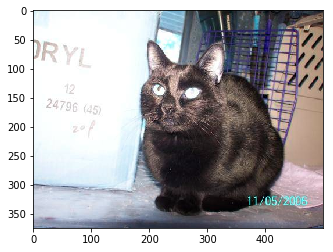

cat


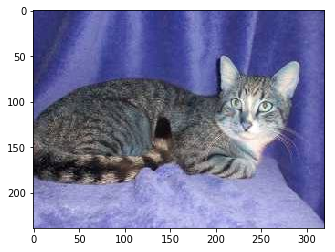

cat


In [2]:
DATA_DIR = "data/dc/train"
for file_name in os.listdir(DATA_DIR)[0:10]:
    img_array = cv2.imread(os.path.join(DATA_DIR, file_name))
    plt.imshow(img_array)
    plt.show()
    print(file_name.split('.')[0])

In [3]:
DATA_DIR = "data/dc/train"
IMG_SIZE = 28
def create_data():
    x = []
    y = []
    for file_name in os.listdir(DATA_DIR):
        img_array = cv2.imread(os.path.join(DATA_DIR, file_name))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        x.append(new_array)
        if file_name.split('.')[0] == 'cat':
            y.append(0)
        else:
            y.append(1)
    return x, y

In [4]:
import random
x, y = create_data()
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(25000, 28, 28, 3)
(25000,)


In [6]:
X_train = x / 255.0
Y_train = to_categorical(y, num_classes = 2)
print(X_train.shape)
print(Y_train.shape)

(25000, 28, 28, 3)
(25000, 2)


In [7]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train,
          y=Y_train, epochs=100, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/100
22500/22500 [==============================] - 190s 8ms/step - loss: 0.8816 - acc: 0.6344 - val_loss: 0.8474 - val_acc: 0.5940
Epoch 2/100
22500/22500 [==============================] - 201s 9ms/step - loss: 0.5664 - acc: 0.7466 - val_loss: 1.0373 - val_acc: 0.4772
Epoch 3/100
22500/22500 [==============================] - 208s 9ms/step - loss: 0.4987 - acc: 0.7931 - val_loss: 0.3895 - val_acc: 0.8700
Epoch 4/100
22500/22500 [==============================] - 191s 8ms/step - loss: 0.4679 - acc: 0.8115 - val_loss: 0.4143 - val_acc: 0.8300
Epoch 5/100
22500/22500 [==============================] - 194s 9ms/step - loss: 0.4377 - acc: 0.8283 - val_loss: 1.1894 - val_acc: 0.4176
Epoch 6/100
22500/22500 [==============================] - 198s 9ms/step - loss: 0.4185 - acc: 0.8409 - val_loss: 0.2812 - val_acc: 0.9132
Epoch 7/100
22500/22500 [==============================] - 192s 9ms/step - loss: 0.4014 - acc: 0.8490 - val_loss: 0.5

In [ ]:
DATA_DIR = "data/dc/test"
IMG_SIZE = 28
def create_test_data():
    x = []
    for i in range(1,12501):
        img_array = cv2.imread(os.path.join(DATA_DIR, str(i) + '.jpg'))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        x.append(new_array)
    return x

In [ ]:
test = create_test_data()
test = np.array(test) / 255.0
results = model.predict(test)
print(results.shape)

In [ ]:
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="label")
submission = pd.concat([pd.Series(range(1,12500),name = "id"),results],axis = 1)

submission.to_csv("dogs_and_cats.csv",index=False)